This notebook will take in a list of questions and calculate sentence similarity scores between each of them using the BERT model. We will begin by importing the dataset itself below. Credit for the "how-to" and code below goes to this [fantastic article](https://towardsdatascience.com/bert-for-measuring-text-similarity-eec91c6bf9e1).

In [25]:
import pandas as pd
dataset = 'curated_questions'
dat = pd.read_csv('../data/processed/' + dataset + '.csv')
dat

,Person,Source,Link,Question
0,Tim Ferriss,17 questions that changed my life,https://tim.blog/wp-content/uploads/2020/01/17-Questions-That-Changed-My-Life.pdf,What if I did the opposite for 48 hours?
1,Tim Ferriss,17 questions that changed my life,https://tim.blog/wp-content/uploads/2020/01/17-Questions-That-Changed-My-Life.pdf,What do I spend a silly amount of money on? How might I scratch my own itch?
2,Tim Ferriss,17 questions that changed my life,https://tim.blog/wp-content/uploads/2020/01/17-Questions-That-Changed-My-Life.pdf,What would I do/have/be if I had $10 million? What’s my real TMI?
3,Tim Ferriss,17 questions that changed my life,https://tim.blog/wp-content/uploads/2020/01/17-Questions-That-Changed-My-Life.pdf,What are the worst things that could happen? Could I get back here?
4,Tim Ferriss,17 questions that changed my life,https://tim.blog/wp-content/uploads/2020/01/17-Questions-That-Changed-My-Life.pdf,"If I could only work 2 hours per week on my business, what would I do?"
...,...,...,...,...
123,Ben Franklin,Junto Questions,https://www.thejuntoinstitute.com/what-we-can-learn-from-ben-franklins-24-questions/,"In what manner can the Junto, or any of them, assist you in any of your honourable designs?"
124,Ben Franklin,Junto Questions,https://www.thejuntoinstitute.com/what-we-can-learn-from-ben-franklins-24-questions/,"Have you any weighty affair in hand, in which you think the advice of the Junto may be of service?"
125,Ben Franklin,Junto Questions,https://www.thejuntoinstitute.com/what-we-can-learn-from-ben-franklins-24-questions/,What benefits have you lately received from any man not present?
126,Ben Franklin,Junto Questions,https://www.thejuntoinstitute.com/what-we-can-learn-from-ben-franklins-24-questions/,"Is there any difficulty in matters of opinion, of justice, and injustice, which you would gladly have discussed at this time?"


Now we will isolate the questions as an array of sentences, which will be fed into a pre-trained "bert-base-nli-mean-tokens" model. We note that there was a "module not found" error in the code below. The maintainer of the sentence-transformers package fixed it and requires the user to install via "pip install -U sentence-transformers." The code below takes a while to run, as the pre-trained model is quite large. A menu of models is [here](https://www.sbert.net/docs/pretrained_models.html)

In [26]:
from sentence_transformers import SentenceTransformer

sentences = dat["Question"].tolist()
sentences[1:5]

#model = SentenceTransformer('bert-base-nli-mean-tokens')
#model = SentenceTransformer('all-mpnet-base-v2')
model = SentenceTransformer('multi-qa-mpnet-base-dot-v1')

sentence_embeddings = model.encode(sentences)
sentence_embeddings.shape

Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction


(128, 768)

Here, we make a topic model for our sentence similarity embedding. We will use the BERTopic library, [here](https://maartengr.github.io/BERTopic/index.html#quick-start)

In [27]:
from bertopic import BERTopic

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(sentences)

display(topic_model.get_topic_info())
display(topic_model.get_topic(0))

Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction


,Topic,Count,Name
0,0,103,0_what_you_of_the
1,1,15,1_we_how_and_the
2,-1,10,-1_or_could_any_what


[('what', 0.10921417135083378),
 ('you', 0.09291339424324538),
 ('of', 0.08225120146123362),
 ('the', 0.07596888317354272),
 ('to', 0.07358067468576734),
 ('or', 0.06931035985045636),
 ('would', 0.06508056169155511),
 ('do', 0.0636444931073479),
 ('my', 0.056802403300686664),
 ('if', 0.05420286678048961)]

From here, we're going to use cosine similarity to determine which questions are most similar to each other. One example of this is below. We compare the initial question to the first five questions after the initial question. We will display the questions and the similarity scores and see if it makes sense. 

In [28]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

cos_sim = cosine_similarity(
    [sentence_embeddings[20]],
    sentence_embeddings
).tolist()

df = pd.DataFrame({'questions': sentences,
            'similarity': cos_sim[0]})

# Arrange by similarity
pd.set_option('display.max_colwidth', None)
display(df.sort_values(by = 'similarity', ascending = False))

,questions,similarity
20,What purchase of $100 or less has most positively impacted your life in the last six months (or in recent memory)?,1.000000
26,"In the last five years, what new belief, behavior, or habit has most improved your life?",0.696183
24,What is one of the best or most worthwhile investments you’ve ever made?,0.686360
71,What would you sacrifice personal benefit for?,0.557156
18,"What is the book (or books) you’ve given most as a gift, and why?",0.554973
...,...,...
38,How would we best bind predative power asymmetries where said asymmetries tend to confer the power to protect and advance themselves?,0.209261
46,How do we develop authentic virtue in people while disincentivizing virtue signaling?,0.206571
41,How do we close the niches for predatory behavior?,0.198476
14,Am I hunting antelope or field mice?,0.194267


We were going to run a UMAP on the vector space to get some intuition around what it looks like, but because UMAP has issues with python 3.9 at the moment, we're going to jump right to making a cosine similarity matrix that we will then turn into a graph. 

In [29]:
import sklearn

dist = sklearn.metrics.pairwise.cosine_distances(sentence_embeddings)
dist

# nn = sklearn.neighbors.kneighbors_graph(sentence_embeddings, n_neighbors = 1)
# nn

array([[0.        , 0.6711586 , 0.64433813, ..., 0.62993443, 0.6936307 ,
        0.7368064 ],
       [0.6711586 , 0.        , 0.5406433 , ..., 0.67504734, 0.8444754 ,
        0.7867703 ],
       [0.64433813, 0.5406433 , 0.        , ..., 0.6861087 , 0.73692775,
        0.8487849 ],
       ...,
       [0.62993443, 0.67504734, 0.6861087 , ..., 0.        , 0.66011095,
        0.7363452 ],
       [0.6936307 , 0.8444754 , 0.73692775, ..., 0.66011095, 0.        ,
        0.5675432 ],
       [0.7368064 , 0.7867703 , 0.8487849 , ..., 0.7363452 , 0.5675432 ,
        0.        ]], dtype=float32)

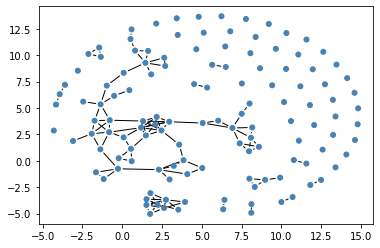

In [30]:
import igraph as ig
import matplotlib.pyplot as plt

dist = np.where(dist == 0, 1, dist) # For the boolean below. Can't figure out compound boolean.
cutoff = 0.4
g = ig.Graph.Adjacency(dist < cutoff) # Need to convert to boolean
g = g.as_undirected()
fig, ax = plt.subplots()
ig.plot(g, target=ax)

Now we will do a quick measure of betweenness and eigenvector centrality to get a feel for what questions are the most central. We'll print the top 10 of each.

In [31]:
deg = g.degree()
btw = g.betweenness()
dat['degree'] = g.degree()
dat['betweenness'] = g.betweenness()
display(dat.sort_values(by='degree', ascending=False))
display(dat.sort_values(by='betweenness', ascending=False))

,Person,Source,Link,Question,degree,betweenness
59,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,"If my life started over with a clean slate (no previous commitments, baggage, etc.), what would I do and how would I be differently?",8,138.483333
124,Ben Franklin,Junto Questions,https://www.thejuntoinstitute.com/what-we-can-learn-from-ben-franklins-24-questions/,"Have you any weighty affair in hand, in which you think the advice of the Junto may be of service?",7,4.833333
115,Ben Franklin,Junto Questions,https://www.thejuntoinstitute.com/what-we-can-learn-from-ben-franklins-24-questions/,"Hath any deserving stranger arrived in town since last meeting, that you heard of? and what have you heard or observed of his character or merits? and whether think you, it lies in the power of the Junto to oblige him, or encourage him as he deserves?",7,6.166667
55,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,"If I was better with people (more understanding, charismatic, empathetic, patient, etc.), what would I do and how would I be differently?",7,328.416667
58,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,"If I had the right team and people supporting me, what would I do and how would I be differently?",7,195.666667
...,...,...,...,...,...,...
14,Tim Ferriss,17 questions that changed my life,https://tim.blog/wp-content/uploads/2020/01/17-Questions-That-Changed-My-Life.pdf,Am I hunting antelope or field mice?,0,0.000000
91,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,What of the things I did last month will I remember and feel good about on my deathbed? Which will I wish I had done differently? How do I factor that into planning my next month?,0,0.000000
13,Tim Ferriss,17 questions that changed my life,https://tim.blog/wp-content/uploads/2020/01/17-Questions-That-Changed-My-Life.pdf,"What might I put in place to allow me to go off the grid for 4 to 8 weeks, with no phone or email?",0,0.000000
12,Tim Ferriss,17 questions that changed my life,https://tim.blog/wp-content/uploads/2020/01/17-Questions-That-Changed-My-Life.pdf,What are the worst things that could happen? Could I get back here?,0,0.000000


,Person,Source,Link,Question,degree,betweenness
26,Tim Ferriss,Tribe of Mentors,https://tim.blog/2017/10/03/tribe-of-mentors/,"In the last five years, what new belief, behavior, or habit has most improved your life?",5,513.000000
70,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,What few qualities would you most want to increase in everyone if you could?,5,419.316667
52,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,"If I was a lot more confident/ less fearful, what would I do and how would I be differently?",6,400.000000
111,Ben Franklin,Junto Questions,https://www.thejuntoinstitute.com/what-we-can-learn-from-ben-franklins-24-questions/,What happy effects of temperance have you lately observed or heard? of prudence? of moderation? or of any other virtue?,2,369.000000
92,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,Where is fear influencing my choices?,3,369.000000
...,...,...,...,...,...,...
37,Daniel Schmachtenberger,Civilization Emerging,https://civilizationemerging.com/,"How would we best identify and remove (the basis for) corruption, without debasing creative agency?",1,0.000000
36,Daniel Schmachtenberger,Civilization Emerging,https://civilizationemerging.com/,How would we best identify and remove perverse economic interests systemically?,1,0.000000
35,Daniel Schmachtenberger,Civilization Emerging,https://civilizationemerging.com/,How would we best identify and internalize externalities in the decision making process?,0,0.000000
34,Daniel Schmachtenberger,Civilization Emerging,https://civilizationemerging.com/,"How do we do adequate safety analysis on radically unprecedented, complex, and consequential technologies like artificial intelligence and synthetic biology? Moreover, how do we bind the development of these technologies to those safety analyses and ensure that they are neither weaponized nor deployed negligently?",0,0.000000


From here, we run clustering to see if the the quesitons group into particular themes. We will use Louvain clustering, as it is often used in graph-based analysis.

In [32]:
clust = ig.Graph.community_multilevel(g)
#df = pd.DataFrame({'name': dat['Question'], 'cluster': clust.membership})
dat['cluster'] = clust.membership

# Get cluster ID, mine the per-cluster topics
for i in pd.unique(dat['cluster']):
    curr = dat[dat['cluster'] == i]
    if curr.shape[0] > 5:
        display(curr.sort_values(by='degree', ascending=False))
        

,Person,Source,Link,Question,degree,betweenness,cluster
78,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,"If all your personal desires were already met, what would you then desire or care about?",6,247.266667,17
26,Tim Ferriss,Tribe of Mentors,https://tim.blog/2017/10/03/tribe-of-mentors/,"In the last five years, what new belief, behavior, or habit has most improved your life?",5,513.000000,17
70,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,What few qualities would you most want to increase in everyone if you could?,5,419.316667,17
71,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,What would you sacrifice personal benefit for?,5,113.350000,17
62,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,What virtues would you most want to increase in yourself? Why those ones?,4,101.266667,17
72,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,What is more important to you than your own life?,3,206.533333,17
20,Tim Ferriss,Tribe of Mentors,https://tim.blog/2017/10/03/tribe-of-mentors/,What purchase of $100 or less has most positively impacted your life in the last six months (or in recent memory)?,2,49.000000,17
24,Tim Ferriss,Tribe of Mentors,https://tim.blog/2017/10/03/tribe-of-mentors/,What is one of the best or most worthwhile investments you’ve ever made?,1,0.000000,17
29,Tim Ferriss,Tribe of Mentors,https://tim.blog/2017/10/03/tribe-of-mentors/,"In the last five years, what have you become better at saying no to (distractions, invitations, etc.)? What new realizations and/or approaches helped? Any other tips?",1,0.000000,17
81,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,What am I willing to do even if it taxes me?,1,0.000000,17


,Person,Source,Link,Question,degree,betweenness,cluster
84,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,What am I intrinsically fascinated by? Passionate about?,5,125.366667,20
74,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,What are you devoted to? What does devotion mean?,4,190.533333,20
82,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,"What do I enjoy doing for its own sake, independent of producing results or getting acknowledgement?",4,130.633333,20
25,Tim Ferriss,Tribe of Mentors,https://tim.blog/2017/10/03/tribe-of-mentors/,What is an unusual habit or an absurd thing that you love?,2,0.000000,20
69,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,What would you spend your time working on if you could succeed but no one would ever know that you did it?,2,153.466667,20
73,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,What is sacred to you? What does sacred mean?,2,0.000000,20
76,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,What are you loyal to? What does loyalty mean? What would be an adequate reason to violate a loyalty?,2,0.000000,20
79,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,What am I naturally good at? What seems to come easy to me? (Looking at strengths and aptitudes more than specific skills.),2,4.666667,20
103,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,What do I do because I’m good at it but don’t really like it or care about it deeply?,2,10.333333,20
66,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,What do you find the most beauty in? What are you most moved by?,1,0.000000,20


,Person,Source,Link,Question,degree,betweenness,cluster
59,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,"If my life started over with a clean slate (no previous commitments, baggage, etc.), what would I do and how would I be differently?",8,138.483333,39
55,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,"If I was better with people (more understanding, charismatic, empathetic, patient, etc.), what would I do and how would I be differently?",7,328.416667,39
58,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,"If I had the right team and people supporting me, what would I do and how would I be differently?",7,195.666667,39
52,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,"If I was a lot more confident/ less fearful, what would I do and how would I be differently?",6,400.000000,39
54,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,"If I had much better discipline, what would I do and how would I be differently?",6,10.200000,39
53,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,"If I was meaningfully smarter than I currently am, what would I do and how would I be differently?",5,71.800000,39
56,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,"If I had better emotional regulation, what would I do and how would I be differently?",5,0.000000,39


,Person,Source,Link,Question,degree,betweenness,cluster
64,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,What issues in the world upset you the most?,6,315.0,42
77,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,What do you feel shame or guilt about?,3,96.0,42
63,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,What types of behavior and people bother you the most?,2,0.0,42
65,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,What do you see as most deeply wrong with or off in the world?,2,0.0,42
85,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,Where have I felt the most pride/satisfaction related to something I did?,2,49.0,42
87,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,What have been the greatest difficulties/pains in my life?,2,0.0,42
110,Ben Franklin,Junto Questions,https://www.thejuntoinstitute.com/what-we-can-learn-from-ben-franklins-24-questions/,What unhappy effects of intemperance have you lately observed or heard? of imprudence? of passion? or of any other vice or folly?,2,336.0,42
111,Ben Franklin,Junto Questions,https://www.thejuntoinstitute.com/what-we-can-learn-from-ben-franklins-24-questions/,What happy effects of temperance have you lately observed or heard? of prudence? of moderation? or of any other virtue?,2,369.0,42
68,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,What news stories about the world would you be most positively moved to see?,1,0.0,42
86,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,When have I felt most fully alive?,1,0.0,42


,Person,Source,Link,Question,degree,betweenness,cluster
96,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,"Where do I feel trapped by past choices (loyalties, commitments, debts, investments, etc.)?",6,312.333333,48
102,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,Where does my life feel imbalanced?,4,48.000000,48
92,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,Where is fear influencing my choices?,3,369.000000,48
94,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,Where is my sense of limited capacity constraining what I focus on?,3,0.333333,48
97,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,Where are lack of self worth or self trust keeping me from showing up in greater service to what I care about?,3,46.000000,48
101,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,Where is my success occurring at the expense of others?,3,0.333333,48
90,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,"Where am I still running the programs of my childhood (early models of success, of who I am, of what I’m capable of, of what’s meaningful…)",2,49.000000,48
93,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,"Where are there incongruences in my self, between my values and my actions…between some desires and other desires…between my habits and the expression of my highest vision…?",2,0.000000,48
98,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,Where is credit seeking or image management influencing how I’m choosing?,2,0.000000,48
89,Daniel Schmachtenberger,Dharma Inquiiry,https://civilizationemerging.com/dharma-inquiry/,"Where are my goals the result of compensations to old wounds? (Proving that I’m enough, proving something to parents or a parental archetype projected on the world, seeking validation externally, proving we aren’t like our parents, etc.)",1,0.000000,48


,Person,Source,Link,Question,degree,betweenness,cluster
115,Ben Franklin,Junto Questions,https://www.thejuntoinstitute.com/what-we-can-learn-from-ben-franklins-24-questions/,"Hath any deserving stranger arrived in town since last meeting, that you heard of? and what have you heard or observed of his character or merits? and whether think you, it lies in the power of the Junto to oblige him, or encourage him as he deserves?",7,6.166667,51
124,Ben Franklin,Junto Questions,https://www.thejuntoinstitute.com/what-we-can-learn-from-ben-franklins-24-questions/,"Have you any weighty affair in hand, in which you think the advice of the Junto may be of service?",7,4.833333,51
114,Ben Franklin,Junto Questions,https://www.thejuntoinstitute.com/what-we-can-learn-from-ben-franklins-24-questions/,"Do you think of any thing at present, in which the Junto may be serviceable to mankind? to their country, to their friends, or to themselves?",6,1.833333,51
123,Ben Franklin,Junto Questions,https://www.thejuntoinstitute.com/what-we-can-learn-from-ben-franklins-24-questions/,"In what manner can the Junto, or any of them, assist you in any of your honourable designs?",6,3.166667,51
116,Ben Franklin,Junto Questions,https://www.thejuntoinstitute.com/what-we-can-learn-from-ben-franklins-24-questions/,"Do you know of any deserving young beginner lately set up, whom it lies in the power of the Junto any way to encourage?",4,0.000000,51
104,Ben Franklin,Junto Questions,https://www.thejuntoinstitute.com/what-we-can-learn-from-ben-franklins-24-questions/,"Have you met with any thing in the author you last read, remarkable, or suitable to be communicated to the Junto? particularly in history, morality, poetry, physics, travels, mechanic arts, or other parts of knowledge?",3,0.000000,51
127,Ben Franklin,Junto Questions,https://www.thejuntoinstitute.com/what-we-can-learn-from-ben-franklins-24-questions/,"Do you see any thing amiss in the present customs or proceedings of the Junto, which might be amended?",3,0.000000,51
120,Ben Franklin,Junto Questions,https://www.thejuntoinstitute.com/what-we-can-learn-from-ben-franklins-24-questions/,"Is there any man whose friendship you want, and which the Junto, or any of them, can procure for you?",2,0.000000,51
122,Ben Franklin,Junto Questions,https://www.thejuntoinstitute.com/what-we-can-learn-from-ben-franklins-24-questions/,"Hath any man injured you, from whom it is in the power of the Junto to procure redress?",2,0.000000,51


In [ ]:
# from bertopic import BERTopic
# import unicodedata2

# model_out = []
# for i in pd.unique(dat['cluster']):
#    curr = dat[dat['cluster'] == i]
#    if curr.shape[0] > 10:
        #display(curr.sort_values(by='degree', ascending=False))
        #out = curr['Question'].str.cat(sep='')
#        out = curr['Question'].tolist() # TODO get rid of common words
#        topics, probs = topic_model.fit_transform(out)
#        result = topic_model.get_topic_info()
#        result['cluster'] = i
#        model_out.append(result)
        #display(topic_model.get_topic_info())
        #out = unicodedata2.normalize("NFKD", out)
        #cluster_docs.append(out)
        

#topic_model = BERTopic()
#topics, probs = topic_model.fit_transform(cluster_docs)

#display(topic_model.get_topic_info())
#display(topic_model.get_topic(0))

# TODO
# Remove what, the, and the others, topic model the remaining bag. Sentence by sentence in a given cluster.
# We won't have this problem for the bible verses, but it will just take a minute longer to pull off
# https://stackoverflow.com/questions/9953619/technique-to-remove-common-wordsand-their-plural-versions-from-a-string

Now, we're going to pull the graph out as an edgelist and get a feel for who is connected to who. We will then export the edgelist for import into Neo4J. 

TODO 1) make this a searchable umap. 2) place this into neo4j 3) set up the virtual environemnt and stop installing anything to the regular environemnt

In [35]:
#model_out = pd.concat(model_out)
#model_out

ValueError: No objects to concatenate

In [37]:
el = g.get_edge_dataframe()
el

,source,target
edge ID,,
0,2,6
1,1,17
2,18,19
3,19,23
4,20,24
...,...,...
114,122,124
115,123,124
116,114,127


Now we have to convert the edges from their edge IDs to the questions that are in the order of the IDs. The reason we're seeing numbers right now is that the original adjacency matrix was made with the IDs and not the questions themselves. We're going to do that using a simple conversion function. We're going to do this by creating a dictionary. 

In [38]:
q_dict = {}

for i in range(0, len(sentences)):
    q_dict[i] = sentences[i]

q_dict

{0: 'What if I did the opposite for 48 hours?',
 1: 'What do I spend a silly amount of money on? How might I scratch my own itch?',
 2: 'What would I do/have/be if I had $10 million? What’s my real TMI?',
 3: 'What are the worst things that could happen? Could I get back here?',
 4: 'If I could only work 2 hours per week on my business, what would I do?',
 5: 'What if I let them make decisions up to $100? $500? $1,000?',
 6: 'What would I do/have/be if I had $10 million? What’s my real TMI?',
 7: 'What’s the least crowded channel?',
 8: 'What if I couldn’t pitch my product directly?',
 9: 'What if I created my own real-world MBA?',
 10: 'Do I need to make it back the way I lost it?',
 11: 'What if I could only subtract to solve problems?',
 12: 'What are the worst things that could happen? Could I get back here?',
 13: 'What might I put in place to allow me to go off the grid for 4 to 8 weeks, with no phone or email?',
 14: 'Am I hunting antelope or field mice?',
 15: 'Could it be that

In [39]:
e1 = [q_dict[i] for i in el['source']]
e2 = [q_dict[i] for i in el['target']]

el_df = pd.DataFrame({'edge1': e1, 'edge2': e2})
el_df 



,edge1,edge2
0,What would I do/have/be if I had $10 million? What’s my real TMI?,What would I do/have/be if I had $10 million? What’s my real TMI?
1,What do I spend a silly amount of money on? How might I scratch my own itch?,How can I throw money at this problem? How can I “waste” money to improve the quality of my life?
2,"What is the book (or books) you’ve given most as a gift, and why?",what are one to three books that have greatly influenced your life?
3,what are one to three books that have greatly influenced your life?,Are there any quotes you think of often or live your life by?
4,What purchase of $100 or less has most positively impacted your life in the last six months (or in recent memory)?,What is one of the best or most worthwhile investments you’ve ever made?
...,...,...
114,"Hath any man injured you, from whom it is in the power of the Junto to procure redress?","Have you any weighty affair in hand, in which you think the advice of the Junto may be of service?"
115,"In what manner can the Junto, or any of them, assist you in any of your honourable designs?","Have you any weighty affair in hand, in which you think the advice of the Junto may be of service?"
116,"Do you think of any thing at present, in which the Junto may be serviceable to mankind? to their country, to their friends, or to themselves?","Do you see any thing amiss in the present customs or proceedings of the Junto, which might be amended?"
117,"In what manner can the Junto, or any of them, assist you in any of your honourable designs?","Do you see any thing amiss in the present customs or proceedings of the Junto, which might be amended?"


In [40]:
el_df.to_csv('../output/' + dataset + '_edgelist_dist_' + str(cutoff) + '.csv', encoding='utf-8-sig')
dat.to_csv('../output/' + dataset + '_analyzed_' + str(cutoff) + '.csv', encoding='utf-8-sig')
#model_out.to_csv('../output/' + dataset + '_topic_model' + str(cutoff) + '.csv', encoding='utf-8-sig')